# 빅데이터 분석 기사 실기 시험 예제 풀이

## 1. 작업형 제1유형 : 데이터 처리 영역
* mtcars 데이터셋(mtcars.csv)의 qsec 컬럼을 최소최대 척도(Min-Max Scale)로 변환한 후 0.5보다 큰 값을 가지는 레코드 수를 구하시오.

In [1]:
import pandas as pd # pandas import

df = pd.read_csv('mtcars.csv') # df에 mtcars.csv를 읽어 데이터프레임으로 저장
df.head() # df의 앞에서 5개 데이터 출력

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


* 방법 1  
sklearn의 MinMaxScaler를 이용해서 변환

In [2]:
from sklearn.preprocessing import MinMaxScaler # sklearn의 min-max scaler import

scaler = MinMaxScaler() # MinMaxScaler 객체 생성

# scaler에 데이터를 넣어서 모델을 만들고 값을 덮어씨움
df['qsec'] = scaler.fit_transform(df[['qsec']])

# qsec가 0.5보다 큰 데이터만 색인해서 길이를 구함
answer = len(df[df['qsec']>0.5])
print(answer)

9


* 방법 2  
Min-Max Scale을 수식으로 만들어서 변환시킴

In [3]:
df['qsec'] = (df['qsec'] - df['qsec'].min()) / (df['qsec'].max() - df['qsec'].min())

answer = len(df[df['qsec']>0.5])
print(answer)

9


## 2. 작업형 제2유형 : 모형 구축 및 평가 영역
* 아래는 백화점 고객의 1년간 구매 데이터이다.
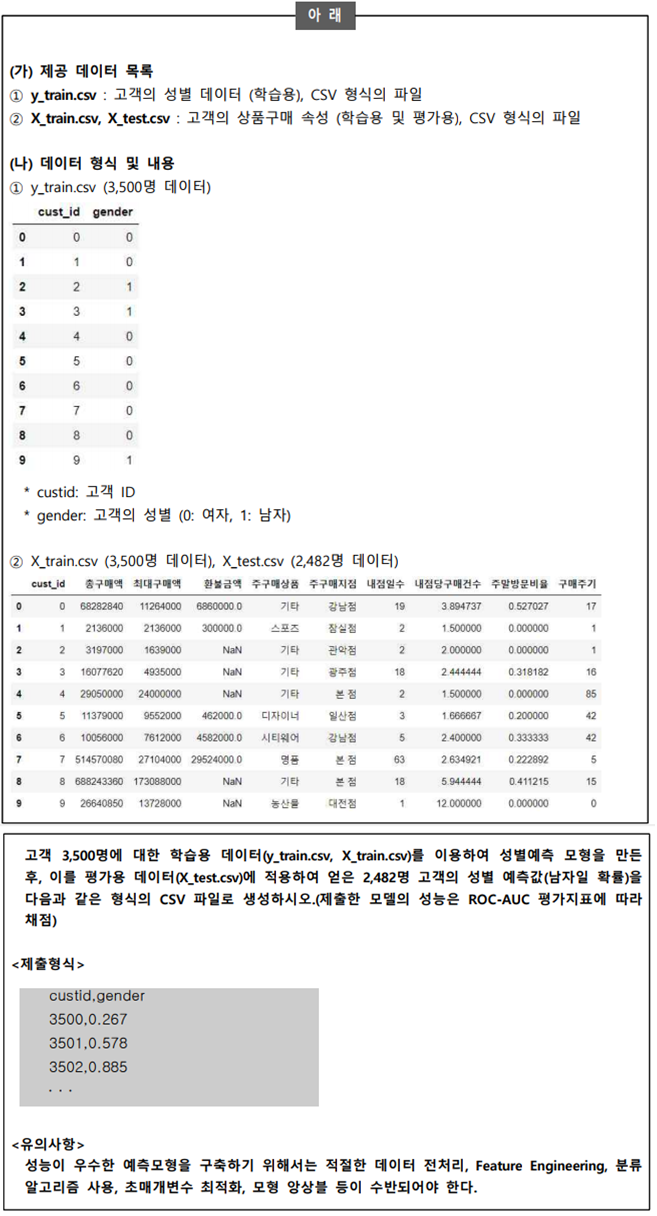

#### 결과 : X_test데이터로 남자일 확률을 구해서 cust_id와 남자일 확률만 가진 csv로 생성
#### 평가지표 : ROC-AUC Curve
#### 확인 사항
* 데이터 전처리
* Feature Engineering
* 분류 모델
* 최적화
* 앙상블

## 1. EDA

In [4]:
import pandas as pd
import numpy as np

In [5]:
X_train = pd.read_csv('X_train.csv', encoding='euc-kr') # 한글이 있어 인코딩하여 읽믕
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv', encoding='euc-kr') # 한글이 있어 인코딩하여 읽믕
 
display(X_train.head())
display(y_train.head())
display(X_test.head())

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85


,cust_id,gender
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0


,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,3500,70900400,22000000,4050000.0,골프,부산본점,13,1.461538,0.789474,26
1,3501,310533100,38558000,48034700.0,농산물,잠실점,90,2.433333,0.369863,3
2,3502,305264140,14825000,30521000.0,가공식품,본 점,101,14.623762,0.083277,3
3,3503,7594080,5225000,NaN,주방용품,부산본점,5,2.000000,0.000000,47
4,3504,1795790,1411200,NaN,수산품,청량리점,3,2.666667,0.125000,8


In [6]:
train_data = X_train.merge(y_train, on='cust_id', how='outer') # X와 y를 합침
train_data.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,0
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16,1
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85,0


* 칼럼 별 데이터 타입과 형태 확인
    * 환불금액에 결측치 있음
    * 주구매상품과 주구매지점만 범주형 데이터 : 필요시 one-hot encoding

In [7]:
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 3499
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  3500 non-null   int64  
 1   총구매액     3500 non-null   int64  
 2   최대구매액    3500 non-null   int64  
 3   환불금액     1205 non-null   float64
 4   주구매상품    3500 non-null   object 
 5   주구매지점    3500 non-null   object 
 6   내점일수     3500 non-null   int64  
 7   내점당구매건수  3500 non-null   float64
 8   주말방문비율   3500 non-null   float64
 9   구매주기     3500 non-null   int64  
 10  gender   3500 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 328.1+ KB


* 결측치 확인
    * 환불금액에 결측치가 대부분(2295 / 3500)

In [8]:
train_data.isnull().sum()

cust_id       0
총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
gender        0
dtype: int64

* 테스트 데이터의 환불금액도 결측치가 많음

In [9]:
X_test.isnull().sum()

cust_id       0
총구매액          0
최대구매액         0
환불금액       1611
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

* 숫자형 데이터의 분포 확인
    * 컬럼마다의 스케일 차이가 커서 변환 필요

In [10]:
train_data.describe()

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,gender
count,3500.000000,3.500000e+03,3.500000e+03,1.205000e+03,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1749.500000,9.191925e+07,1.966424e+07,2.407822e+07,19.253714,2.834963,0.307246,20.958286,0.376000
std,1010.507298,1.635065e+08,3.199235e+07,4.746453e+07,27.174942,1.912368,0.289752,24.748682,0.484449
min,0.000000,-5.242152e+07,-2.992000e+06,5.600000e+03,1.000000,1.000000,0.000000,0.000000,0.000000
25%,874.750000,4.747050e+06,2.875000e+06,2.259000e+06,2.000000,1.666667,0.027291,4.000000,0.000000
50%,1749.500000,2.822270e+07,9.837000e+06,7.392000e+06,8.000000,2.333333,0.256410,13.000000,0.000000
75%,2624.250000,1.065079e+08,2.296250e+07,2.412000e+07,25.000000,3.375000,0.448980,28.000000,1.000000
max,3499.000000,2.323180e+09,7.066290e+08,5.637530e+08,285.000000,22.083333,1.000000,166.000000,1.000000


* 문자 데이터 분포 확인

In [11]:
train_data.describe(include=[object])

,주구매상품,주구매지점
count,3500,3500
unique,42,24
top,기타,본 점
freq,595,1077


In [12]:
display(train_data['주구매상품'].unique(), len(train_data['주구매상품'].unique()))
display(X_test['주구매상품'].unique(), len(X_test['주구매상품'].unique()))
display(train_data['주구매지점'].unique(), len(train_data['주구매지점'].unique()))
display(X_test['주구매지점'].unique(), len(X_test['주구매지점'].unique()))

array(['기타', '스포츠', '남성 캐주얼', '보석', '디자이너', '시티웨어', '명품', '농산물', '화장품',
       '골프', '구두', '가공식품', '수산품', '아동', '차/커피', '캐주얼', '섬유잡화', '육류',
       '축산가공', '젓갈/반찬', '액세서리', '피혁잡화', '일용잡화', '주방가전', '주방용품', '건강식품',
       '가구', '주류', '모피/피혁', '남성 트랜디', '셔츠', '남성정장', '생활잡화', '트래디셔널',
       '란제리/내의', '커리어', '침구/수예', '대형가전', '통신/컴퓨터', '식기', '소형가전', '악기'],
      dtype=object)

42

array(['골프', '농산물', '가공식품', '주방용품', '수산품', '화장품', '기타', '스포츠', '디자이너',
       '시티웨어', '구두', '캐주얼', '명품', '건강식품', '남성정장', '커리어', '남성 캐주얼', '축산가공',
       '식기', '피혁잡화', '모피/피혁', '섬유잡화', '트래디셔널', '차/커피', '육류', '가구', '아동',
       '셔츠', '액세서리', '젓갈/반찬', '대형가전', '일용잡화', '통신/컴퓨터', '생활잡화', '주방가전',
       '란제리/내의', '남성 트랜디', '보석', '주류', '침구/수예', '악기'], dtype=object)

41

array(['강남점', '잠실점', '관악점', '광주점', '본  점', '일산점', '대전점', '부산본점', '분당점',
       '영등포점', '미아점', '청량리점', '안양점', '부평점', '동래점', '포항점', '노원점', '창원점',
       '센텀시티점', '인천점', '대구점', '전주점', '울산점', '상인점'], dtype=object)

24

array(['부산본점', '잠실점', '본  점', '청량리점', '분당점', '일산점', '대전점', '강남점', '동래점',
       '영등포점', '부평점', '대구점', '노원점', '광주점', '관악점', '미아점', '창원점', '인천점',
       '안양점', '상인점', '포항점', '울산점', '전주점', '센텀시티점'], dtype=object)

24

* 주구매상품에서 차이나는 상품 확인

In [13]:
for i in train_data['주구매상품'].unique():
    if i not in X_test['주구매상품'].unique():
        print(i)

소형가전


* train_data에 소형 가전 데이터 확인

In [14]:
train_data[train_data['주구매상품']=='소형가전']

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
1521,1521,178000,178000,NaN,소형가전,본 점,1,1.0,1.0,0,0
2035,2035,260000,260000,NaN,소형가전,잠실점,1,1.0,0.0,0,1


In [15]:
2/3500 # 0.05% 소형가전 데이터

0.0005714285714285715

* 총구매액과 최대구매액에 음수가 확인되어 해당 데이터 출력  
     * 모두 여자의 경우로 확인됨
     * 환불 금액이 최대구매액보다 많은 것의 의미?
     * 최대구매액이 음수는 뭔가?

In [16]:
train_data[(train_data['총구매액']<=0) | (train_data['최대구매액']<=0)]

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
813,813,0,8000000,8000000.0,스포츠,분당점,2,1.000000,0.500000,1,0
1209,1209,0,4200000,7350000.0,생활잡화,본 점,2,2.000000,1.000000,0,0
1659,1659,-2992000,-2992000,2992000.0,디자이너,본 점,1,1.000000,0.000000,0,0
1871,1871,0,6160000,6160000.0,시티웨어,분당점,2,1.000000,1.000000,0,0
1886,1886,0,1416000,1534000.0,시티웨어,영등포점,2,3.000000,0.500000,0,0
2208,2208,0,1575000,1575000.0,피혁잡화,부산본점,2,1.000000,0.500000,4,0
2696,2696,0,170000,700700.0,차/커피,일산점,2,9.000000,0.000000,4,0
3174,3174,-52421520,13616000,97222000.0,기타,본 점,18,4.444444,0.337500,16,0
3411,3411,0,3520000,3520000.0,디자이너,분당점,2,1.000000,0.000000,10,0
3488,3488,-18905600,82306000,529602320.0,디자이너,부산본점,31,1.064516,0.242424,11,0


* 테스트 데이터도 확인
    * 0과 음수의 값을 어떻게 처리할 것인가?

In [17]:
X_test[(X_test['총구매액']<=0) | (X_test['최대구매액']<=0)]

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
138,3638,0,108576000,108576000.0,대형가전,본 점,2,1.0,0.0,24
579,4079,-150000,-150000,150000.0,구두,분당점,1,1.0,0.0,0
1177,4677,-37440000,-37440000,37440000.0,대형가전,본 점,1,1.0,0.0,0
1305,4805,0,4417500,4417500.0,명품,잠실점,2,1.0,0.5,12
1510,5010,0,1035000,1080000.0,섬유잡화,잠실점,2,2.0,0.5,1
1527,5027,0,9310000,9310000.0,모피/피혁,잠실점,2,1.0,0.0,1
1785,5285,0,115808000,115808000.0,모피/피혁,잠실점,2,1.0,0.0,1
1926,5426,0,7410000,7410000.0,모피/피혁,본 점,3,1.0,0.0,0
1929,5429,0,936000,975000.0,셔츠,영등포점,2,2.0,0.0,0


* train_data에서 gender에 따른 값들 비교

In [18]:
display(train_data.groupby('gender').min())
display(train_data.groupby('gender').mean())
display(train_data.groupby('gender').max())

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
gender,,,,,,,,,,
0,0,-52421520,-2992000,18000.0,가공식품,강남점,1,1.0,0.0,0
1,2,5000,5000,5600.0,가공식품,강남점,1,1.0,0.0,0


,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기
gender,,,,,,,,
0,1751.063645,1.109727e+08,2.250294e+07,2.616227e+07,22.522894,2.900148,0.290695,20.162088
1,1746.905015,6.029865e+07,1.495320e+07,1.750266e+07,13.828267,2.726785,0.334714,22.279635


,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
gender,,,,,,,,,,
0,3499,2323180070,706629000,563753000.0,화장품,포항점,211,20.000000,1.0,166
1,3496,998131220,391000000,210771400.0,화장품,포항점,285,22.083333,1.0,162


* train_data끼리의 상관계수 확인  
    * gender와 상관관계가 높은 데이터가 없음

In [19]:
train_data.corr()

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,gender
cust_id,1.000000,-0.008004,-0.005883,0.070135,-0.025234,-0.004840,0.001900,0.020070,-0.001994
총구매액,-0.008004,1.000000,0.700080,0.419734,0.659084,0.090022,0.014396,-0.212944,-0.150141
최대구매액,-0.005883,0.700080,1.000000,0.410562,0.374147,0.018980,0.022277,-0.115837,-0.114323
환불금액,0.070135,0.419734,0.410562,1.000000,0.270290,-0.063114,-0.062397,-0.211125,-0.078025
내점일수,-0.025234,0.659084,0.374147,0.270290,1.000000,0.225264,-0.010325,-0.293200,-0.155000
내점당구매건수,-0.004840,0.090022,0.018980,-0.063114,0.225264,1.000000,0.007659,-0.091151,-0.043917
주말방문비율,0.001900,0.014396,0.022277,-0.062397,-0.010325,0.007659,1.000000,0.003372,0.073598
구매주기,0.020070,-0.212944,-0.115837,-0.211125,-0.293200,-0.091151,0.003372,1.000000,0.041450
gender,-0.001994,-0.150141,-0.114323,-0.078025,-0.155000,-0.043917,0.073598,0.041450,1.000000


* 성별에 따른 특이점이 보이지 않음
* 전체 데이터에 성별 데이터 수 확인

In [20]:
print('전체 데이터 :', len(train_data))
print('여자 데이터 수 :', len(train_data[train_data['gender']==0]))
print('남자 데이터 수 :', len(train_data[train_data['gender']==1]))
print('데이터에서 남자일 확률 : {}%'.format(round((len(train_data[train_data['gender']==1]) / len(train_data))*100, 1)))

전체 데이터 : 3500
여자 데이터 수 : 2184
남자 데이터 수 : 1316
데이터에서 남자일 확률 : 37.6%


### 2. 데이터 전처리

* 환불금액의 결측치를 0으로 대체

In [21]:
train_data['환불금액'].fillna(0, inplace=True)
X_test['환불금액'].fillna(0, inplace=True)

display(train_data.isnull().sum())
display(X_test.isnull().sum())

cust_id    0
총구매액       0
최대구매액      0
환불금액       0
주구매상품      0
주구매지점      0
내점일수       0
내점당구매건수    0
주말방문비율     0
구매주기       0
gender     0
dtype: int64

cust_id    0
총구매액       0
최대구매액      0
환불금액       0
주구매상품      0
주구매지점      0
내점일수       0
내점당구매건수    0
주말방문비율     0
구매주기       0
dtype: int64

* 주구매상품이 소형가전인 데이터 삭제

In [22]:
train_data.drop(train_data[train_data['주구매상품']=='소형가전'].index, inplace=True)
train_data[train_data['주구매상품']=='소형가전']

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender


### 3. Feature Engineering

* 연속형 데이터 : 표준 정규 분포로 변환
    * 내점당구매건수, 구매주기는 결과를 보고 삭제도 검토(상관계수 낮음)

In [23]:
train_data.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,0
2,2,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1,1
3,3,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16,1
4,4,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85,0


In [24]:
conti_cols = ['총구매액', '최대구매액', '환불금액','내점일수', '내점당구매건수', '주말방문비율', '구매주기']

# 표준 정규 분표 scaler 사용하여 train데이터에서 만들 scaler를 test에 동일하게 적용하여 변환
from sklearn.preprocessing import StandardScaler

for col in conti_cols:
    scaler = StandardScaler()
    scaler.fit(train_data[[col]])
    
    train_data[col] = scaler.transform(train_data[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

    
display(train_data.describe())
display(X_test.describe())

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,gender
count,3498.000000,3.498000e+03,3.498000e+03,3.498000e+03,3.498000e+03,3.498000e+03,3.498000e+03,3.498000e+03,3498.000000
mean,1749.483705,4.049870e-17,5.455899e-17,-1.661526e-16,-5.151206e-17,2.520616e-16,-4.405345e-17,2.751753e-17,0.375929
std,1010.777305,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,0.484431
min,0.000000,-8.830568e-01,-7.084980e-01,-2.755136e-01,-6.720860e-01,-9.601883e-01,-1.060884e+00,-8.473814e-01,0.000000
25%,874.250000,-5.333858e-01,-5.250782e-01,-2.755136e-01,-6.352879e-01,-6.103605e-01,-9.649366e-01,-6.857466e-01,0.000000
50%,1749.500000,-3.895661e-01,-3.071670e-01,-2.755136e-01,-4.144993e-01,-2.628885e-01,-1.752131e-01,-3.220682e-01,0.000000
75%,2624.750000,9.010556e-02,1.035253e-01,-1.877311e-01,2.110683e-01,2.818770e-01,4.893364e-01,2.840623e-01,1.000000
max,3499.000000,1.364527e+01,2.147164e+01,1.845028e+01,9.778573e+00,1.006586e+01,2.393233e+00,5.860464e+00,1.000000


,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기
count,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000
mean,4740.500000,0.055382,0.065486,0.022277,0.009301,-0.008694,-0.046023,-0.027648
std,716.636007,1.059310,1.095508,1.237365,0.955793,0.917585,0.976133,0.974204
min,3500.000000,-0.791435,-1.785215,-0.275514,-0.672086,-0.960188,-1.060884,-0.847381
25%,4120.250000,-0.531417,-0.524825,-0.275514,-0.635288,-0.567957,-0.979865,-0.685747
50%,4740.500000,-0.375836,-0.278896,-0.275514,-0.377701,-0.211836,-0.197355,-0.322068
75%,5360.750000,0.210707,0.206343,-0.176720,0.275465,0.281877,0.402162,0.243654
max,5981.000000,16.935832,17.927045,28.672982,7.460293,6.819063,2.393233,6.304959


* 범주형 데이터 원핫인코딩

In [25]:
categorical_cols = ['주구매상품', '주구매지점']

for col in categorical_cols:
    temp = pd.get_dummies(train_data[col])
    train_data = pd.concat([train_data, temp], axis=1)
    del train_data[col]
    
    temp = pd.get_dummies(X_test[col])
    X_test = pd.concat([X_test, temp], axis=1)
    del X_test[col]
    
display(train_data.head())
display(X_test.head())

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,gender,가공식품,...,안양점,영등포점,울산점,인천점,일산점,잠실점,전주점,창원점,청량리점,포항점
0,0,-0.144872,-0.262908,-0.047650,-0.009720,0.553686,0.759529,-0.160433,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,-0.549403,-0.548216,-0.265549,-0.635288,-0.698701,-1.060884,-0.806973,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,-0.542914,-0.563750,-0.275514,-0.635288,-0.437213,-1.060884,-0.806973,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,-0.464141,-0.460729,-0.275514,-0.046518,-0.204780,0.038153,-0.200842,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,-0.384806,0.135172,-0.275514,-0.635288,-0.698701,-1.060884,2.587359,0,0,...,0,0,0,0,0,0,0,0,0,0


,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,가공식품,가구,...,안양점,영등포점,울산점,인천점,일산점,잠실점,전주점,창원점,청량리점,포항점
0,3500,-0.128864,0.072660,-0.140987,-0.230509,-0.718815,1.666051,0.203245,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3501,1.336643,0.590202,1.320022,2.602945,-0.210591,0.216666,-0.726155,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3502,1.304420,-0.151604,0.738282,3.007724,6.164697,-0.773236,-0.726155,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3503,-0.516023,-0.451665,-0.275514,-0.524894,-0.437213,-1.060884,1.051828,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3504,-0.551483,-0.570870,-0.275514,-0.598490,-0.088564,-0.629120,-0.524112,0,0,...,0,0,0,0,0,0,0,0,1,0


### 4. 분류 알고리즘

In [28]:
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트
from sklearn.linear_model import LogisticRegression # 로지스틱회귀
from sklearn.metrics import roc_auc_score # 예제의 평가지표인 ROC_AUC score

x_cols = list(train_data.columns)
x_cols.remove('cust_id')
x_cols.remove('gender')

X = train_data[x_cols]
y = train_data['gender']
test_x = X_test[x_cols]

# 랜덤포레스트 모델 생성/학습
model_rf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=32)
model_rf.fit(X, y)
pred_rf = model_rf.predict_proba(X)

print('RF ROCAUC Score: ', roc_auc_score(y, pred_rf[:,1]))

# 로지스틱 회귀 모델 생성/학습
model_lr = LogisticRegression()
model_lr.fit(X, y)
pred_lr = model_lr.predict_proba(X)

print('LR ROCAUC Score: ', roc_auc_score(y, pred_lr[:,1]))

RF ROCAUC Score:  0.7546568802481672
LR ROCAUC Score:  0.6955802615788438


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 5. 결과 제출

In [43]:
# ROC_AUC score가 높은 랜덤폴스트로 테스트 데이터로 결과 예측값 정리
pred_result = pd.DataFrame(model_rf.predict_proba(test_x))
result = pd.concat([X_test['cust_id'], pred_result[[1]]], axis=1)
result.columns = [['cust_id', 'gender']] # 예측결과의 컬럼이 1이므로 문제와 동일하게 컬럼 변경
result

,cust_id,gender
0,3500,0.359269
1,3501,0.210629
2,3502,0.226371
3,3503,0.427673
4,3504,0.467135
...,...,...
2477,5977,0.448788
2478,5978,0.530531
2479,5979,0.482498
2480,5980,0.419555


In [44]:
result.to_csv('result.csv', index=False) # 별도의 인덱스 없이 csv로 저장